In [1]:
# Install TensorFlow if not already available
!pip install tensorflow


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [3]:
from google.colab import files
uploaded = files.upload()


Saving style.jpg to style.jpg


In [4]:
from google.colab import files
uploaded = files.upload()


Saving content.jpeg to content.jpeg


In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import time
import functools
from keras.preprocessing import image

In [16]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [17]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In [18]:
content_image_path = '/content/content.jpeg'  # Replace with your content image path
style_image_path = '/content/style.jpg'  # Replace with your style image path

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

In [19]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

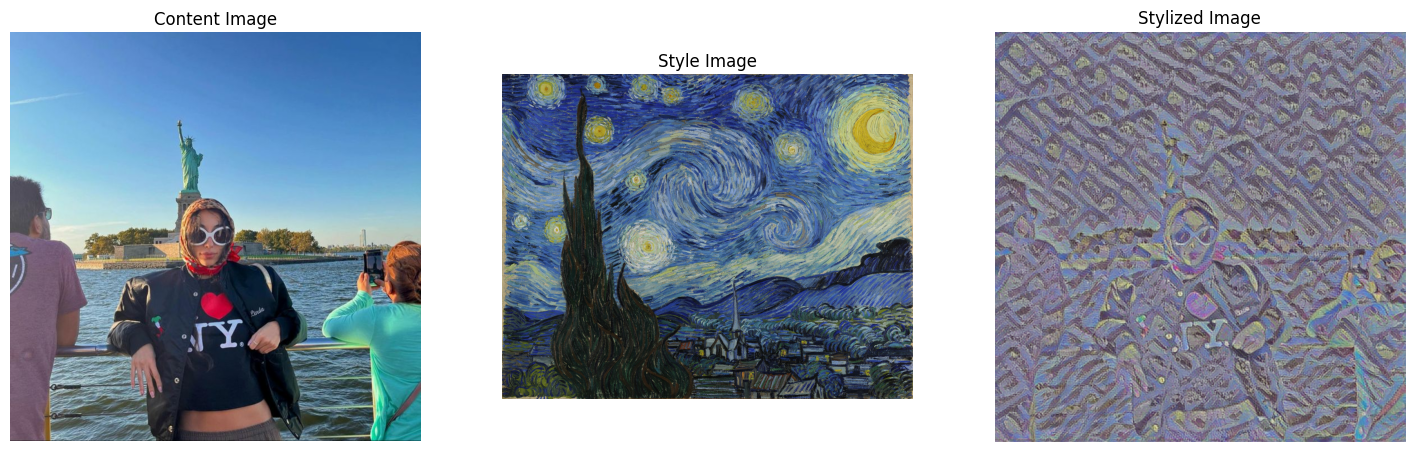

In [20]:
plt.figure(figsize=(18, 18))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(content_image))
plt.title("Content Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(style_image))
plt.title("Style Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(stylized_image))
plt.title("Stylized Image")
plt.axis("off")

plt.show()